### SGD

In [1]:
%matplotlib inline
from fastai.basics import *

In [2]:
n=100


In [3]:
x = torch.ones(n,2) 

In [4]:
x[:,0].uniform_(-1.,1)

tensor([-0.8529, -0.1621,  0.8395, -0.0657,  0.2827,  0.6372, -0.9292,  0.4236,
        -0.2550, -0.1465, -0.9039,  0.1481, -0.4041, -0.5382, -0.8215, -0.6010,
        -0.1356, -0.0775,  0.6765,  0.7051, -0.8249,  0.5357, -0.2830, -0.8036,
         0.9427,  0.1503, -0.3022, -0.3414,  0.8260,  0.7579,  0.7886,  0.4548,
         0.4881,  0.0684, -0.0361, -0.4088,  0.0919,  0.4078,  0.3577, -0.7813,
         0.0651,  0.9422, -0.1082,  0.1961, -0.5830, -0.9927,  0.6188,  0.3721,
         0.8970,  0.1812,  0.8365,  0.4421, -0.8261,  0.0316,  0.2399,  0.0945,
         0.2646, -0.7040, -0.8285, -0.6378, -0.3720,  0.6981, -0.0799, -0.1611,
        -0.8723,  0.3032, -0.3985,  0.2294,  0.7156, -0.0503,  0.5952,  0.9378,
         0.6919, -0.6812,  0.2590,  0.5388,  0.2306,  0.6074, -0.5455,  0.6451,
         0.9433, -0.4898,  0.9819, -0.9870,  0.6302,  0.8901, -0.2784, -0.3901,
        -0.4773,  0.2867,  0.2936, -0.3002, -0.1048,  0.7816, -0.2973, -0.2166,
         0.1189, -0.6386, -0.4149, -0.49

In [5]:
a = tensor(3.,2); a


tensor([3., 2.])

In [6]:
y = x@a + torch.rand(n)

In [7]:
x.shape, a.shape

(torch.Size([100, 2]), torch.Size([2]))

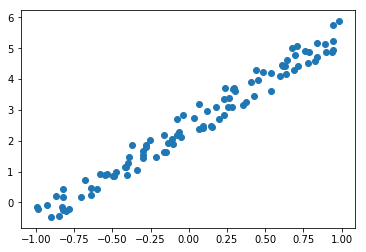

In [8]:
plt.scatter(x[:,0], y);

You want to find parameters (weights) a such that you minimize the error between the points and the line x@a. Note that here a is unknown. For a regression problem the most common error function or loss function is the mean squared error.

In [9]:
def mse(y_hat, y): return ((y_hat-y)**2).mean()

In [10]:
a = tensor(-1.,1)


In [11]:
y_hat = x@a
mse(y_hat, y)

tensor(7.7752)

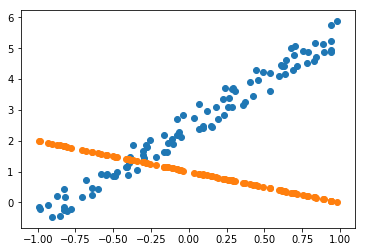

In [12]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat);

So far we have specified the model (linear regression) and the evaluation criteria (or loss function). Now we need to handle optimization; that is, how do we find the best values for a? How do we find the best fitting linear regression.

Gradient Descent
We would like to find the values of a that minimize mse_loss.

Gradient descent is an algorithm that minimizes functions. Given a function defined by a set of parameters, gradient descent starts with an initial set of parameter values and iteratively moves toward a set of parameter values that minimize the function. This iterative minimization is achieved by taking steps in the negative direction of the function gradient.

In [13]:
a = nn.Parameter(a); a


Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [16]:
def update():
    y_hat = x@a
    loss = mse(y, y_hat)
    if t % 10 == 0: print(loss)
    loss.backward()
    with torch.no_grad():
        a.sub_(lr * a.grad)
        a.grad.zero_()

In [17]:
lr = 1e-1
for t in range(100): update()

tensor(7.7752, grad_fn=<MeanBackward1>)
tensor(1.2426, grad_fn=<MeanBackward1>)
tensor(0.3891, grad_fn=<MeanBackward1>)
tensor(0.1647, grad_fn=<MeanBackward1>)
tensor(0.1045, grad_fn=<MeanBackward1>)
tensor(0.0884, grad_fn=<MeanBackward1>)
tensor(0.0840, grad_fn=<MeanBackward1>)
tensor(0.0829, grad_fn=<MeanBackward1>)
tensor(0.0826, grad_fn=<MeanBackward1>)
tensor(0.0825, grad_fn=<MeanBackward1>)


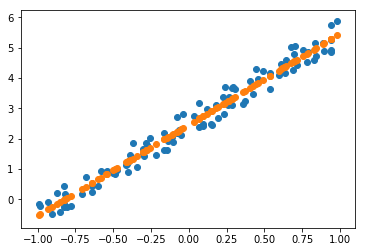

In [18]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],x@a);

### Animate it!

In [27]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [28]:
a = nn.Parameter(tensor(-1.,1))

fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
line, = plt.plot(x[:,0], x@a)
plt.close()

def animate(i):
    update()
    line.set_ydata(x@a)
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)